In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# Define the number of records
num_records = 1000

# Generate random data
data = {
    'CustomerID': range(1, num_records + 1),
    'Gender': [random.choice(['Male', 'Female']) for _ in range(num_records)],
    'Age': [random.randint(18, 70) for _ in range(num_records)],
    'Tenure': [random.randint(1, 72) for _ in range(num_records)],
    'MonthlyCharges': [round(random.uniform(20, 120), 2) for _ in range(num_records)],
    'TotalCharges': [round(random.uniform(100, 8000), 2) for _ in range(num_records)],
    'Contract': [random.choice(['Month-to-month', 'One year', 'Two year']) for _ in range(num_records)],
    'Churn': [random.choice(['Yes', 'No']) for _ in range(num_records)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('telecom_data.csv', index=False)

print("Sample data: 'telecom_data.csv'")


Sample data: 'telecom_data.csv'


In [5]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,Male,44,47,24.62,6491.62,One year,Yes
1,2,Male,27,30,54.59,4188.75,Month-to-month,No
2,3,Male,63,49,23.61,5571.60,Month-to-month,Yes
3,4,Male,28,53,26.53,7109.31,Two year,Yes
4,5,Female,35,64,102.86,5648.67,Month-to-month,Yes


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   Tenure          1000 non-null   int64  
 4   MonthlyCharges  1000 non-null   float64
 5   TotalCharges    1000 non-null   float64
 6   Contract        1000 non-null   object 
 7   Churn           1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [8]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.746000,37.111000,69.935170,4147.810160
std,288.819436,14.923344,21.104361,29.362307,2291.323013
min,1.000000,18.000000,1.000000,20.170000,100.320000
25%,250.750000,31.000000,18.000000,44.042500,2103.365000
50%,500.500000,44.000000,37.000000,69.655000,4318.960000
75%,750.250000,56.000000,55.000000,95.097500,6060.297500
max,1000.000000,70.000000,72.000000,119.950000,7977.420000


In [9]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
Churn             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
gender_dummies = pd.get_dummies(df.Gender, prefix='Gender')
gender_dummies.head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [13]:
df['Gender_Male'] = gender_dummies.Gender_Male
df['Gender_Female'] = gender_dummies.Gender_Female

df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female
0,1,Male,44,47,24.62,6491.62,One year,Yes,True,False
1,2,Male,27,30,54.59,4188.75,Month-to-month,No,True,False
2,3,Male,63,49,23.61,5571.60,Month-to-month,Yes,True,False
3,4,Male,28,53,26.53,7109.31,Two year,Yes,True,False
4,5,Female,35,64,102.86,5648.67,Month-to-month,Yes,False,True


In [14]:
df.Churn.unique(), df.Churn.value_counts()

(array(['Yes', 'No'], dtype=object),
 Churn
 No     509
 Yes    491
 Name: count, dtype: int64)

<Axes: xlabel='Churn'>

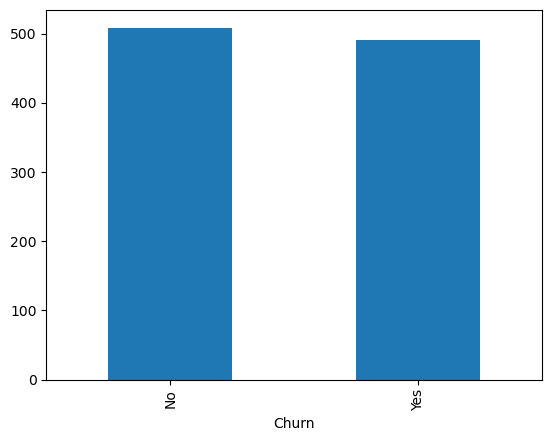

In [15]:
df.Churn.value_counts().plot.bar()

In [16]:
df['Churn'] = df.Churn.apply(lambda x: 0 if x == 'No' else 1)

In [18]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female
0,1,Male,44,47,24.62,6491.62,One year,1,True,False
1,2,Male,27,30,54.59,4188.75,Month-to-month,0,True,False
2,3,Male,63,49,23.61,5571.60,Month-to-month,1,True,False
3,4,Male,28,53,26.53,7109.31,Two year,1,True,False
4,5,Female,35,64,102.86,5648.67,Month-to-month,1,False,True


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# for vizualizing the tree
import pydotplus
from IPython.display import Image 

In [20]:
# Create decision tree classifer object
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = df[['Gender_Male', 'Gender_Female', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']]
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [22]:
# logistic regression model fit
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [23]:
# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0]


0.47